## Total 1000/500/200 pulsars in SKA region

Data has been saved to total_1000PSR_list.txt file.


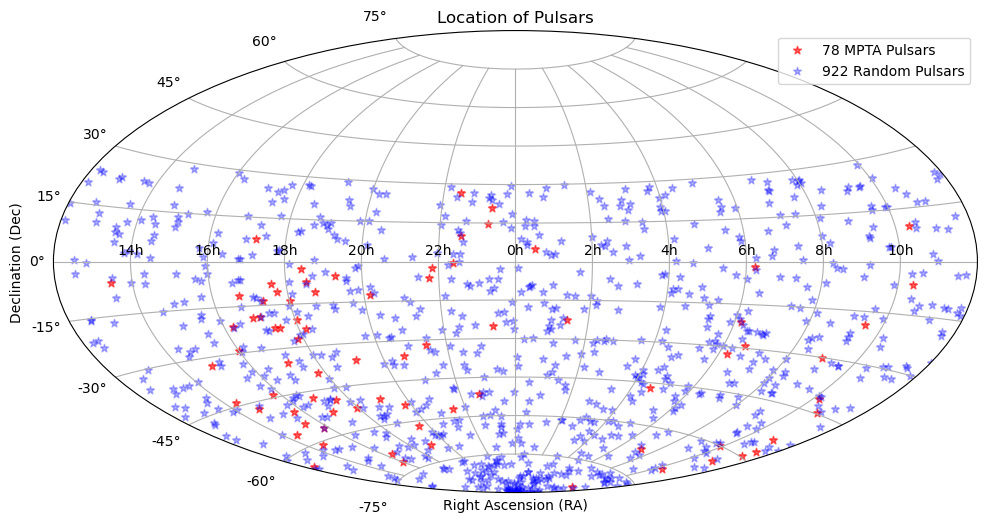

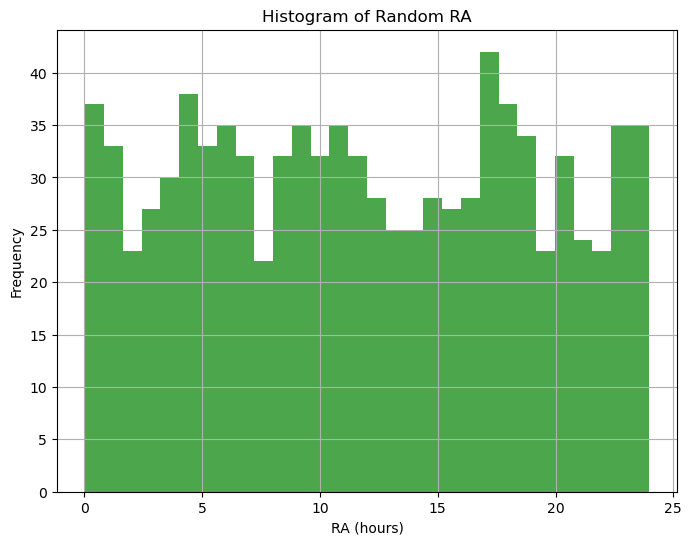

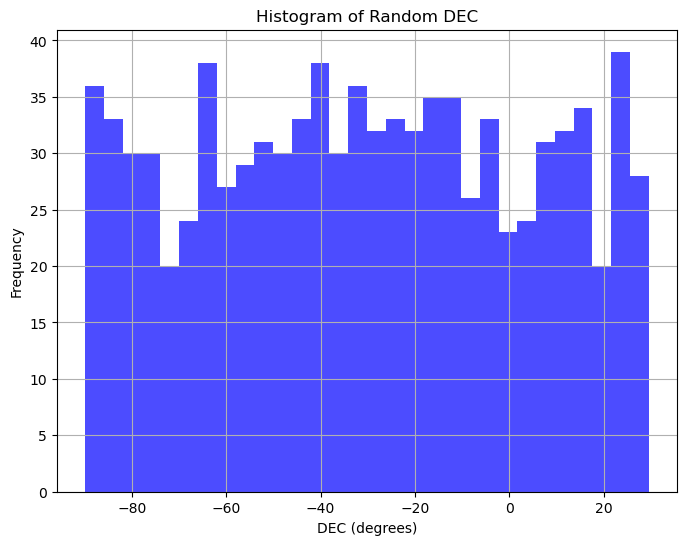

In [1]:
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

# Function to read RA and DEC from a file
def read_ra_dec(filename):
    ra_hour_min = []
    dec_deg_min = []
    with open(filename, 'r') as file:
        for line in file:
            data = line.split('\t')
            ra_hour_min.append(data[1])
            dec_deg_min.append(data[2])
    return ra_hour_min, dec_deg_min

# Read RA and DEC from mpta_PSR.txt file
mpta_ra_hour_min, mpta_dec_deg_min = read_ra_dec('/Users/debabratadeb/python_codes/Reggie_Gopu/mpta_PSR.txt')

# Convert RA from hour and min to hours
mpta_ra_hours = []
for ra in mpta_ra_hour_min:
    ra_parts = ra.split(':')
    mpta_ra_hours.append(float(ra_parts[0]) + float(ra_parts[1]) / 60)

# Convert DEC from degree and min to degrees
mpta_dec_deg = []
for dec in mpta_dec_deg_min:
    dec_parts = dec.split(':')
    mpta_dec_deg.append(float(dec_parts[0]) + float(dec_parts[1]) / 60)

# Create SkyCoord objects for All_PSR and mpta_PSR
mpta_coords = SkyCoord(ra=mpta_ra_hours*u.hourangle, dec=mpta_dec_deg*u.deg, frame='icrs')

total_psr = 1000
mpta_psrno = 78
random_pulsar_no = total_psr - mpta_psrno

# Generate random RA and DEC uniformly distributed across the sky
ra_random = np.random.uniform(0, 24, random_pulsar_no)  # Random RA in hours
dec_random = np.random.uniform(-90, 30, random_pulsar_no)  # Random DEC in degrees

# Create SkyCoord object for random coordinates
coords_random = SkyCoord(ra=ra_random*u.hourangle, dec=dec_random*u.deg, frame='icrs')

# Filter pulsars with declination below +30 degrees
mpta_coords_filtered = mpta_coords[mpta_coords.dec < 30*u.deg]
coords_random_filtered = coords_random[coords_random.dec < 30*u.deg]


########################### Record Pulsar_name, RA and DEC in a text file ##################################

# Open the output file
with open(f'total_{total_psr}PSR_list.txt', 'w') as output_file:
    # Write header
    output_file.write("#Pulsar_Name\tRA\tDEC\n")
    
    # # Write data for mpta_PSR
    # for i in range(len(mpta_ra_hour_min)):
    #     ra_hour_min = mpta_ra_hour_min[i]
    #     dec_deg = mpta_dec_deg[i]
    #     dec_min = mpta_dec_min[i]
    #     pulsar_name = f"J{ra_hour_min.replace(':', '')}{dec_deg:+03.0f}{dec_min:02.0f}"
    #     output_file.write(f"{pulsar_name}\t{ra_hour_min}\t{dec_deg:+03.0f}:{dec_min:02.0f}\n")
    
    # Write data for random pulsars
    for i, coord in enumerate(coords_random):
        ra_hour, ra_min, _ = coord.ra.hms
        dec_deg, dec_min, _ = coord.dec.dms
        if dec_min < 0:  # Ensure dec_min is not negative
            dec_min = abs(dec_min)
        if dec_min == 0:  # Ensure dec_min is not zero
            dec_min = abs(dec_min)
        # Ensure dec_deg is written with a leading zero if it's a single digit
        dec_deg_str = f"{dec_deg:+03.0f}" if dec_deg >= 0 else f"{dec_deg:03.0f}"
        # Ensure that both '+' and '-' symbols are not used back to back before DEC part
        if dec_deg_str[0] == '+' or dec_deg_str[0] == '-':
            if dec_deg_str[1] == '+' or dec_deg_str[1] == '-':
                dec_deg_str = dec_deg_str[0] + dec_deg_str[2:]
        output_file.write(f"J{ra_hour:02.0f}{ra_min:02.0f}{dec_deg_str}{dec_min:02.0f}\t{ra_hour:02.0f}:{ra_min:02.0f}\t{dec_deg_str}:{dec_min:02.0f}\n")

print(f"Data has been saved to total_{total_psr}PSR_list.txt file.")

###########################################################################################

# Plot the distribution
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='aitoff')

# Convert RA from hours to radians
mpta_ra_rad = mpta_coords_filtered.ra.wrap_at(180 * u.deg).radian
ra_random_rad = coords_random_filtered.ra.wrap_at(180 * u.deg).radian

# Plot using RA in hours
ax.scatter(mpta_ra_rad, mpta_coords_filtered.dec.radian, marker='*', color='red', label=f'{mpta_psrno} MPTA Pulsars', alpha=0.6)
ax.scatter(ra_random_rad, coords_random_filtered.dec.radian, marker='*', color='blue', label=f'{random_pulsar_no} Random Pulsars', alpha=0.3)
ax.grid(True)

# Set custom tick labels for RA
ax.set_xticklabels(['14h', '16h', '18h', '20h', '22h', '0h', '2h', '4h', '6h', '8h', '10h'])

plt.title('Location of Pulsars')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.legend()
#plt.savefig(f'/Users/debabratadeb/python_codes/Reggie_Gopu/{total_psr}_pulsars.pdf')
plt.show()

# Plot histogram of random RA
plt.figure(figsize=(8, 6))
plt.hist(ra_random, bins=30, color='green', alpha=0.7)
plt.title('Histogram of Random RA')
plt.xlabel('RA (hours)')
plt.ylabel('Frequency')
plt.grid(True)
#plt.savefig('/Users/debabratadeb/python_codes/Reggie_Gopu/random_RA_histogram.pdf')
plt.show()

# Plot histogram of random DEC
plt.figure(figsize=(8, 6))
plt.hist(dec_random, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Random DEC')
plt.xlabel('DEC (degrees)')
plt.ylabel('Frequency')
plt.grid(True)
#plt.savefig('/Users/debabratadeb/python_codes/Reggie_Gopu/random_DEC_histogram.pdf')
plt.show()


## RA and DEC list of Random PSRs starting with MPTA PSRs RA and DEC

In [11]:
from astropy.coordinates import SkyCoord
import numpy as np
import astropy.units as u

# Function to read RA and DEC from a file
def read_ra_dec(filename):
    ra_hour_min = []
    dec_deg_min = []
    with open(filename, 'r') as file:
        for line in file:
            data = line.split('\t')
            ra_hour_min.append(data[1])
            dec_deg_min.append(data[2])
    return ra_hour_min, dec_deg_min

# Read RA and DEC from mpta_PSR.txt file
mpta_ra_hour_min, mpta_dec_deg_min = read_ra_dec('/Users/debabratadeb/python_codes/Reggie_Gopu/mpta_PSR.txt')

# Convert RA from hour and min to hours
mpta_ra_hours = []
for ra in mpta_ra_hour_min:
    ra_parts = ra.split(':')
    mpta_ra_hours.append(float(ra_parts[0]) + float(ra_parts[1]) / 60)

# Convert DEC from degree and min to degrees
mpta_dec_deg = []
mpta_dec_min = []
for dec in mpta_dec_deg_min:
    dec_parts = dec.split(':')
    mpta_dec_deg.append(float(dec_parts[0]))
    mpta_dec_min.append(float(dec_parts[1]))

total_psr = 1000
mpta_psrno = 78
random_pulsar_no = total_psr - mpta_psrno

# Generate random RA and DEC uniformly distributed across the sky
ra_random = np.random.uniform(0, 24, random_pulsar_no)  # Random RA in hours
dec_random = np.random.uniform(-90, 30, random_pulsar_no)  # Random DEC in degrees

# Create SkyCoord object for random coordinates
coords_random = SkyCoord(ra=ra_random*u.hourangle, dec=dec_random*u.deg, frame='icrs')

# Open the output file
with open('output.txt', 'w') as output_file:
    # Write header
    output_file.write("#Pulsar_Name\tRA\tDEC\n")
    
    # # Write data for mpta_PSR
    # for i in range(len(mpta_ra_hour_min)):
    #     ra_hour_min = mpta_ra_hour_min[i]
    #     dec_deg = mpta_dec_deg[i]
    #     dec_min = mpta_dec_min[i]
    #     pulsar_name = f"J{ra_hour_min.replace(':', '')}{dec_deg:+03.0f}{dec_min:02.0f}"
    #     output_file.write(f"{pulsar_name}\t{ra_hour_min}\t{dec_deg:+03.0f}:{dec_min:02.0f}\n")
    
    # Write data for random pulsars
    for i, coord in enumerate(coords_random):
        ra_hour, ra_min, _ = coord.ra.hms
        dec_deg, dec_min, _ = coord.dec.dms
        if dec_min < 0:  # Ensure dec_min is not negative
            dec_min = abs(dec_min)
        if dec_min == 0:  # Ensure dec_min is not zero
            dec_min = abs(dec_min)
        # Ensure dec_deg is written with a leading zero if it's a single digit
        dec_deg_str = f"{dec_deg:+03.0f}" if dec_deg >= 0 else f"{dec_deg:03.0f}"
        # Ensure that both '+' and '-' symbols are not used back to back before DEC part
        if dec_deg_str[0] == '+' or dec_deg_str[0] == '-':
            if dec_deg_str[1] == '+' or dec_deg_str[1] == '-':
                dec_deg_str = dec_deg_str[0] + dec_deg_str[2:]
        output_file.write(f"J{ra_hour:02.0f}{ra_min:02.0f}{dec_deg_str}{dec_min:02.0f}\t{ra_hour:02.0f}:{ra_min:02.0f}\t{dec_deg_str}:{dec_min:02.0f}\n")

print("Data has been saved to output.txt file.")


Data has been saved to output.txt file.


## Replicate MPTA parfiles for the random pulsars

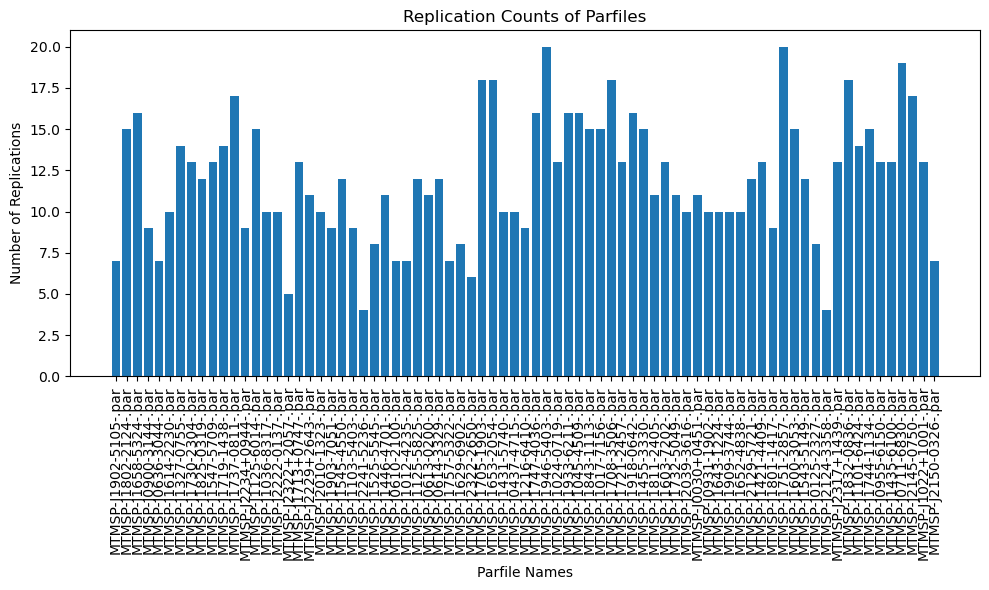

In [5]:
import os
import random
import matplotlib.pyplot as plt

# Define paths
input_file = "/Users/debabratadeb/python_codes/Reggie_Gopu/total_1000PSR_list.txt"
parfiles_directory = "/Users/debabratadeb/python_codes/Reggie_Gopu/parfiles/MPTA_parfiles/"
output_directory = "/Users/debabratadeb/python_codes/Reggie_Gopu/parfiles/random_pulsars/"

# Read the input file and extract pulsar names
pulsar_names = []
with open(input_file, 'r') as f:
    for line in f:
        if not line.startswith('#'):
            parts = line.strip().split()
            pulsar_names.append(parts[0])

# Get a list of parfiles
parfiles = os.listdir(parfiles_directory)
parfiles = [file for file in parfiles if file.endswith('.par')]

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Initialize replication counts
replication_counts = {parfile: 0 for parfile in parfiles}

# Copy and rename parfiles based on pulsar names
for pulsar_name in pulsar_names:
    # Choose a random parfile
    random_parfile = random.choice(parfiles)
    
    # Increment replication count for the chosen parfile
    replication_counts[random_parfile] += 1
    
    # Construct paths
    old_path = os.path.join(parfiles_directory, random_parfile)
    new_name = pulsar_name + ".par"
    new_path = os.path.join(output_directory, new_name)
    
    # Copy the parfile
    os.system(f'cp "{old_path}" "{new_path}"')

# Plot histogram of replication counts
plt.figure(figsize=(10, 6))
plt.bar(replication_counts.keys(), replication_counts.values())
plt.xlabel('Parfile Names')
plt.ylabel('Number of Replications')
plt.title('Replication Counts of Parfiles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Check whether all the parfiles are available for all the random pulsars

In [6]:
import os

# Define paths
parfiles_directory = "/Users/debabratadeb/python_codes/Reggie_Gopu/parfiles/random_pulsars/"
input_file = "/Users/debabratadeb/python_codes/Reggie_Gopu/total_1000PSR_list.txt"

# Read the list of pulsar names from the input file
pulsar_names = []
with open(input_file, 'r') as f:
    for line in f:
        if not line.startswith('#'):
            parts = line.strip().split()
            pulsar_names.append(parts[0])

# Get the list of filenames in the parfiles directory
parfile_filenames = os.listdir(parfiles_directory)

# Extract the pulsar names from the filenames
existing_pulsar_names = [filename[:10] for filename in parfile_filenames]

# Check for missing pulsar names
missing_pulsar_names = set(pulsar_names) - set(existing_pulsar_names)

# Print the missing pulsar names
if missing_pulsar_names:
    print("Missing Pulsar Names:")
    for name in missing_pulsar_names:
        print(name)
else:
    print("No missing pulsar names found.")


No missing pulsar names found.


## Update the PSRJ, RAJ and DECJ values based on the pulsar_name

In [11]:
import os

# Define paths
parfiles_directory = "/Users/debabratadeb/python_codes/Reggie_Gopu/parfiles/random_pulsars/"
input_file = "/Users/debabratadeb/python_codes/Reggie_Gopu/total_1000PSR_list.txt"

# Read the list of pulsar names and corresponding RA, DEC values from the input file
pulsar_data = {}
with open(input_file, 'r') as f:
    for line in f:
        if not line.startswith('#'):
            parts = line.strip().split()
            pulsar_name = parts[0]
            ra = parts[1]
            dec = parts[2]
            pulsar_data[pulsar_name] = (ra, dec)

# Get the list of filenames in the parfiles directory
parfile_filenames = os.listdir(parfiles_directory)

# Update the parfiles
for filename in parfile_filenames:
    # Extract pulsar name from the filename
    pulsar_name = filename[:10]
    if pulsar_name in pulsar_data:
        ra, dec = pulsar_data[pulsar_name]
        with open(os.path.join(parfiles_directory, filename), 'r+') as file:
            lines = file.readlines()
            file.seek(0)
            for line in lines:
                if line.startswith('PSRJ'):
                    file.write(f"{line.split()[0]:<14} {pulsar_name}\n")
                elif line.startswith('RAJ'):
                    file.write(f"{line.split()[0]:<14} {ra}\n")
                elif line.startswith('DECJ'):
                    file.write(f"{line.split()[0]:<14} {dec}\n")
                else:
                    file.write(line)
            file.truncate()
    print(f"Updated parfile for {pulsar_name} is completed.")


Updated parfile for J2322-6012 is completed.
Updated parfile for J2319+2602 is completed.
Updated parfile for J0351-6819 is completed.
Updated parfile for J0200-1318 is completed.
Updated parfile for J2228-8520 is completed.
Updated parfile for J0337-3650 is completed.
Updated parfile for J2340-8651 is completed.
Updated parfile for J0403-6017 is completed.
Updated parfile for J1206+1034 is completed.
Updated parfile for J1308-3617 is completed.
Updated parfile for J0934+1627 is completed.
Updated parfile for J0220+0558 is completed.
Updated parfile for J0354-0443 is completed.
Updated parfile for J0220-3014 is completed.
Updated parfile for J0541-4848 is completed.
Updated parfile for J0046-1617 is completed.
Updated parfile for J1939-1044 is completed.
Updated parfile for J1552-3604 is completed.
Updated parfile for J1813+2652 is completed.
Updated parfile for J1231+0019 is completed.
Updated parfile for J0008+0844 is completed.
Updated parfile for J0408+0811 is completed.
Updated pa